### Problem Statment:-  This assignment is a programming assignment ,wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes.

### Business Goal:- You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# Step-1 : Reading and Understanding Data

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Importing statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', None)

### Reading Dataset


In [2]:
bike_data=pd.read_csv('day (1).csv')

In [3]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_data.shape

(730, 16)

In [5]:
bike_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


C:\Users\Rohan\AppData\Local\Temp/ipykernel_9668/4108429148.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  bike_data.info(verbose=True, null_counts=True)


### Missing value 

In [6]:
bike_data.isnull().sum()/len(bike_data)*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### The Data Set has no Missing Values.

### Dropping Columns which are not Relevant.

    -instant,dteday, casual, registered

In [7]:
bike_data.drop(['instant','dteday','casual','registered'],inplace=True,axis=1)

In [8]:
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [9]:
bike_data.shape

(730, 12)

#### Changing column name for better understanding

In [10]:
bike_data.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [11]:
bike_data.season = bike_data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [12]:
bike_data.month = bike_data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [13]:
bike_data.weekday = bike_data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [14]:
bike_data.weathersit = bike_data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

#### The data set has now 12 columns and 730 rows

### Checking for outliers

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


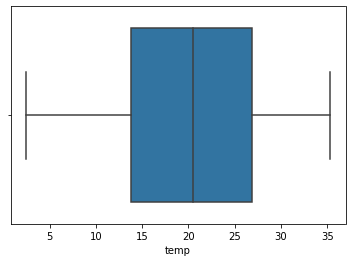

In [15]:
sns.boxplot(bike_data['temp'])
plt.show()

In [16]:
bike_data.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


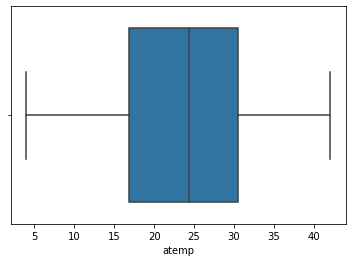

In [17]:
sns.boxplot(bike_data['atemp'])
plt.show()

In [18]:
bike_data.atemp.describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


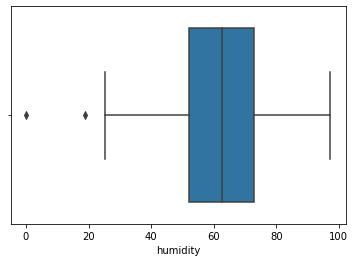

In [19]:
sns.boxplot(bike_data['humidity'])
plt.show()

In [20]:
bike_data.humidity.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: humidity, dtype: float64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


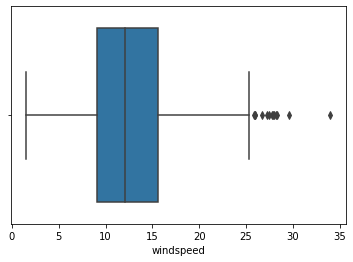

In [21]:
sns.boxplot(bike_data['windspeed'])
plt.show()

In [22]:
bike_data.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

### We can consider windspeed and humidity as exceptional phenomenon. And treating outliers in it can give us some insights for our business problem solving.

# Step-2 :- EDA and Data Visualisation

## EDA

### Since our target variable is 'cnt'.  We would do Univariate and Bivariate analysis w.r.t 'cnt'

## Univariate Analysis

In [23]:
bike_data.cnt.describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


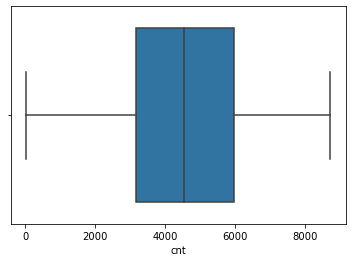

In [24]:
sns.boxplot(bike_data['cnt'])
plt.show()

In [25]:
bike_data.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

Text(0.5, 1.0, 'season count')

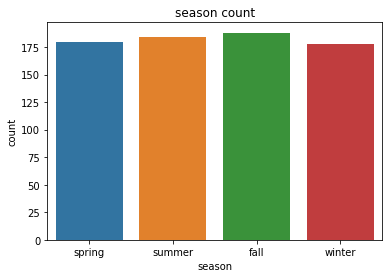

In [26]:
sns.countplot(x = 'season', data = bike_data)
plt.xticks(rotation = 0)
plt.title('season count')

In [27]:
bike_data.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

Text(0.5, 1.0, 'holiday count')

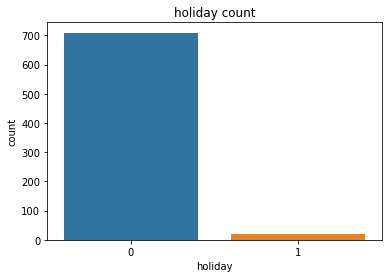

In [28]:
sns.countplot(x = 'holiday', data = bike_data)
plt.xticks(rotation = 0)
plt.title('holiday count')

In [29]:
bike_data.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

Text(0.5, 1.0, 'workingday count')

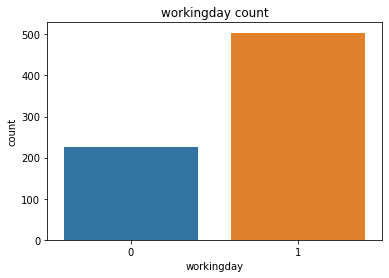

In [30]:
sns.countplot(x = 'workingday', data = bike_data)
plt.xticks(rotation = 0)
plt.title('workingday count')

### Bivariate Analysis

In [31]:
# For categorical Variables
def plot_categy(column):
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=bike_data)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=bike_data, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


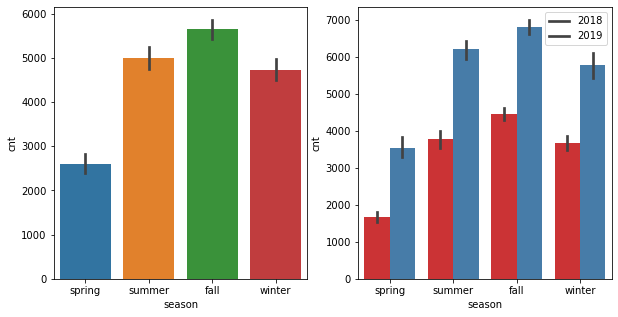

In [32]:
plot_categy('season')

### summer and fall season sees maximum usage 

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


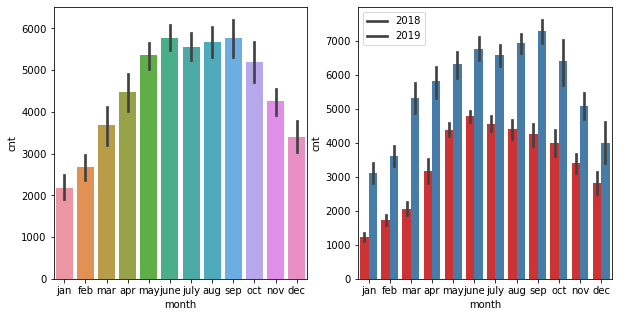

In [33]:
plot_categy('month')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


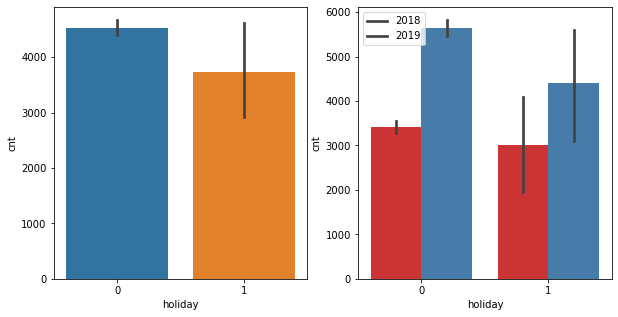

In [34]:
plot_categy('holiday')

#### During the year 2018, the number of rental bikes used is very less compared to year 2019.
#### There is also not so huge difference between usage of rental bikes during holiday and non holiday days
#### year 2019 sees sufficiently high use of rental bikes more than twice of 2018.The company can consider business stratergy used during year 2019.

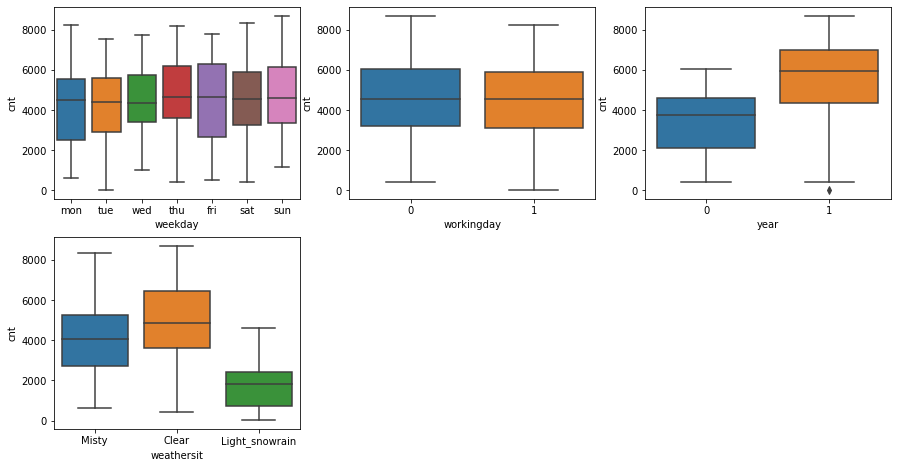

In [35]:
plt.figure(figsize=(15, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'year', y = 'cnt', data = bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.show()

#### Weekday variable sees  booking of bike concentrating between 3000 to 6000, with median for all days is almost same at 4500.
#### Year 2019 sees as much as double bookings as that of year 2018. as mentioned earlier, the company can consider business stratergies used during this year for further improvment.
####  weather1 shows maximum booking followed by weathersit 2 and last at weathersit 3 , showing variations.

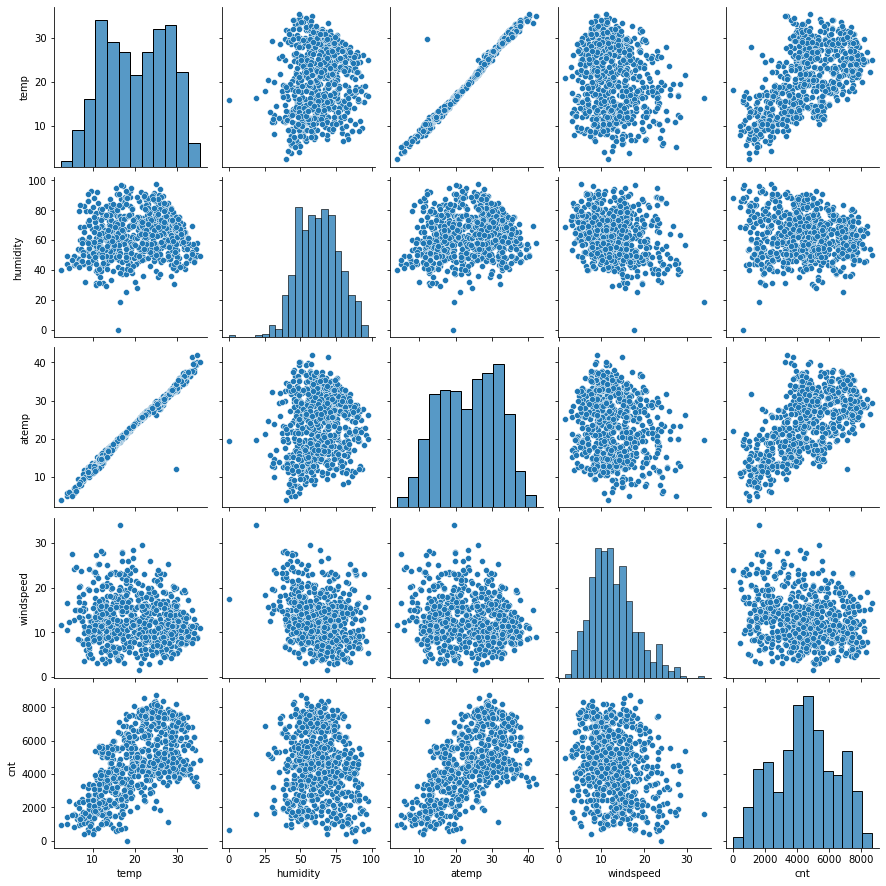

In [36]:
# For numerical Variables
sns.pairplot(bike_data, vars=['temp','humidity','atemp','windspeed',"cnt"])
plt.show()

#### Linear relation between temp and atemp
#### positive relationship between temp,cnt;atemp,cnt ; 
#### Frequency distribution is more concentrated between 3000-6000 for "cnt"
#### Frequency distribution is more concentrated between 10 to 30 degrees  for "temp"

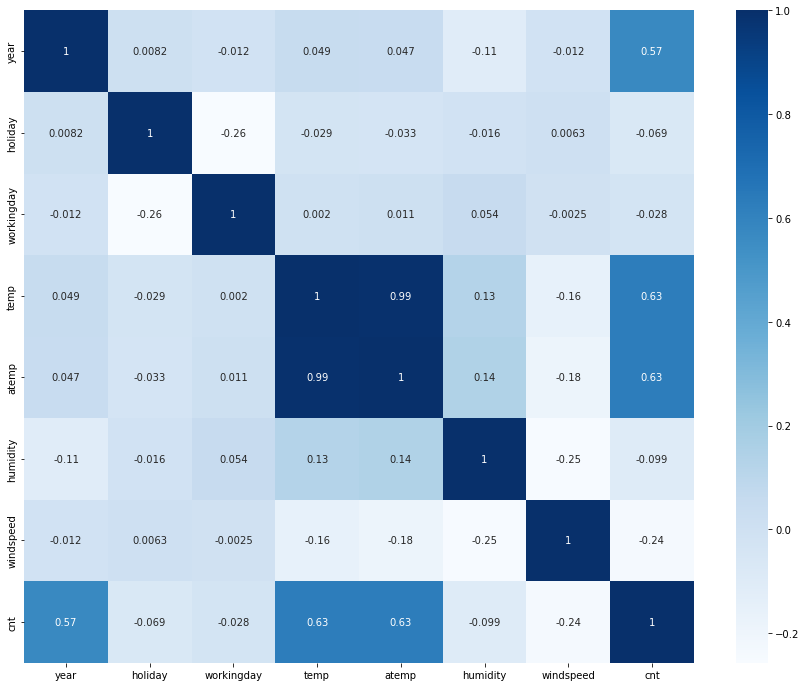

In [37]:
plt.figure(figsize=(15, 12))
sns.heatmap(bike_data.corr(), annot = True, cmap="Blues")
plt.show()

#### There is a correlation of 0.83 between month and season
####  A correlation of 0.63 between atemp,temp and cnt variables.
#### There is also decent correlation between humidity and weathersit

# Step-3 :Data Preparation. 

### Creating dummy variables for all categorical variables where nos of categories are greater than 2

#### Variables:- season, month, weekday, weathersit

In [38]:
# Creating dummy variables
seasons_bd=pd.get_dummies(bike_data.season,drop_first=True)
months_bd=pd.get_dummies(bike_data.month,drop_first=True)
weekdays_bd=pd.get_dummies(bike_data.weekday,drop_first=True)
weathersit_bd=pd.get_dummies(bike_data.weathersit,drop_first=True)


In [39]:
# Merging dummy variables with dataset.
bike_data_new = pd.concat([bike_data,months_bd,weekdays_bd,weathersit_bd,seasons_bd],axis=1)

In [40]:
bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [41]:
# dropping unnecessary columns as we have already created dummy variable out of it.

bike_data_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

# Step-4 : test-train split and scale the features.

#### Test train split  USING (80-20) Model

In [42]:
df_train, df_test = train_test_split(bike_data_new, train_size = 0.8, random_state = 100)


In [43]:
df_train.shape

(584, 30)

In [44]:
df_test.shape

(146, 30)

#### Scaling 

In [45]:
# Instantiate the object
scaler = MinMaxScaler()

# Create a list of numeric variables
num_vars = ['temp','atemp','humidity','windspeed','cnt']

# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [46]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
367,1,0,1,0.113228,0.061963,0.454701,0.695175,0.254717,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0.868385,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
44,0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
705,1,0,0,0.326094,0.318824,0.787463,0.189819,0.573631,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
379,1,0,1,0.133996,0.108365,0.431945,0.449210,0.263346,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


### AS can be observed all the numeric variables are scaled between 0 to 1 similar to categorical variables

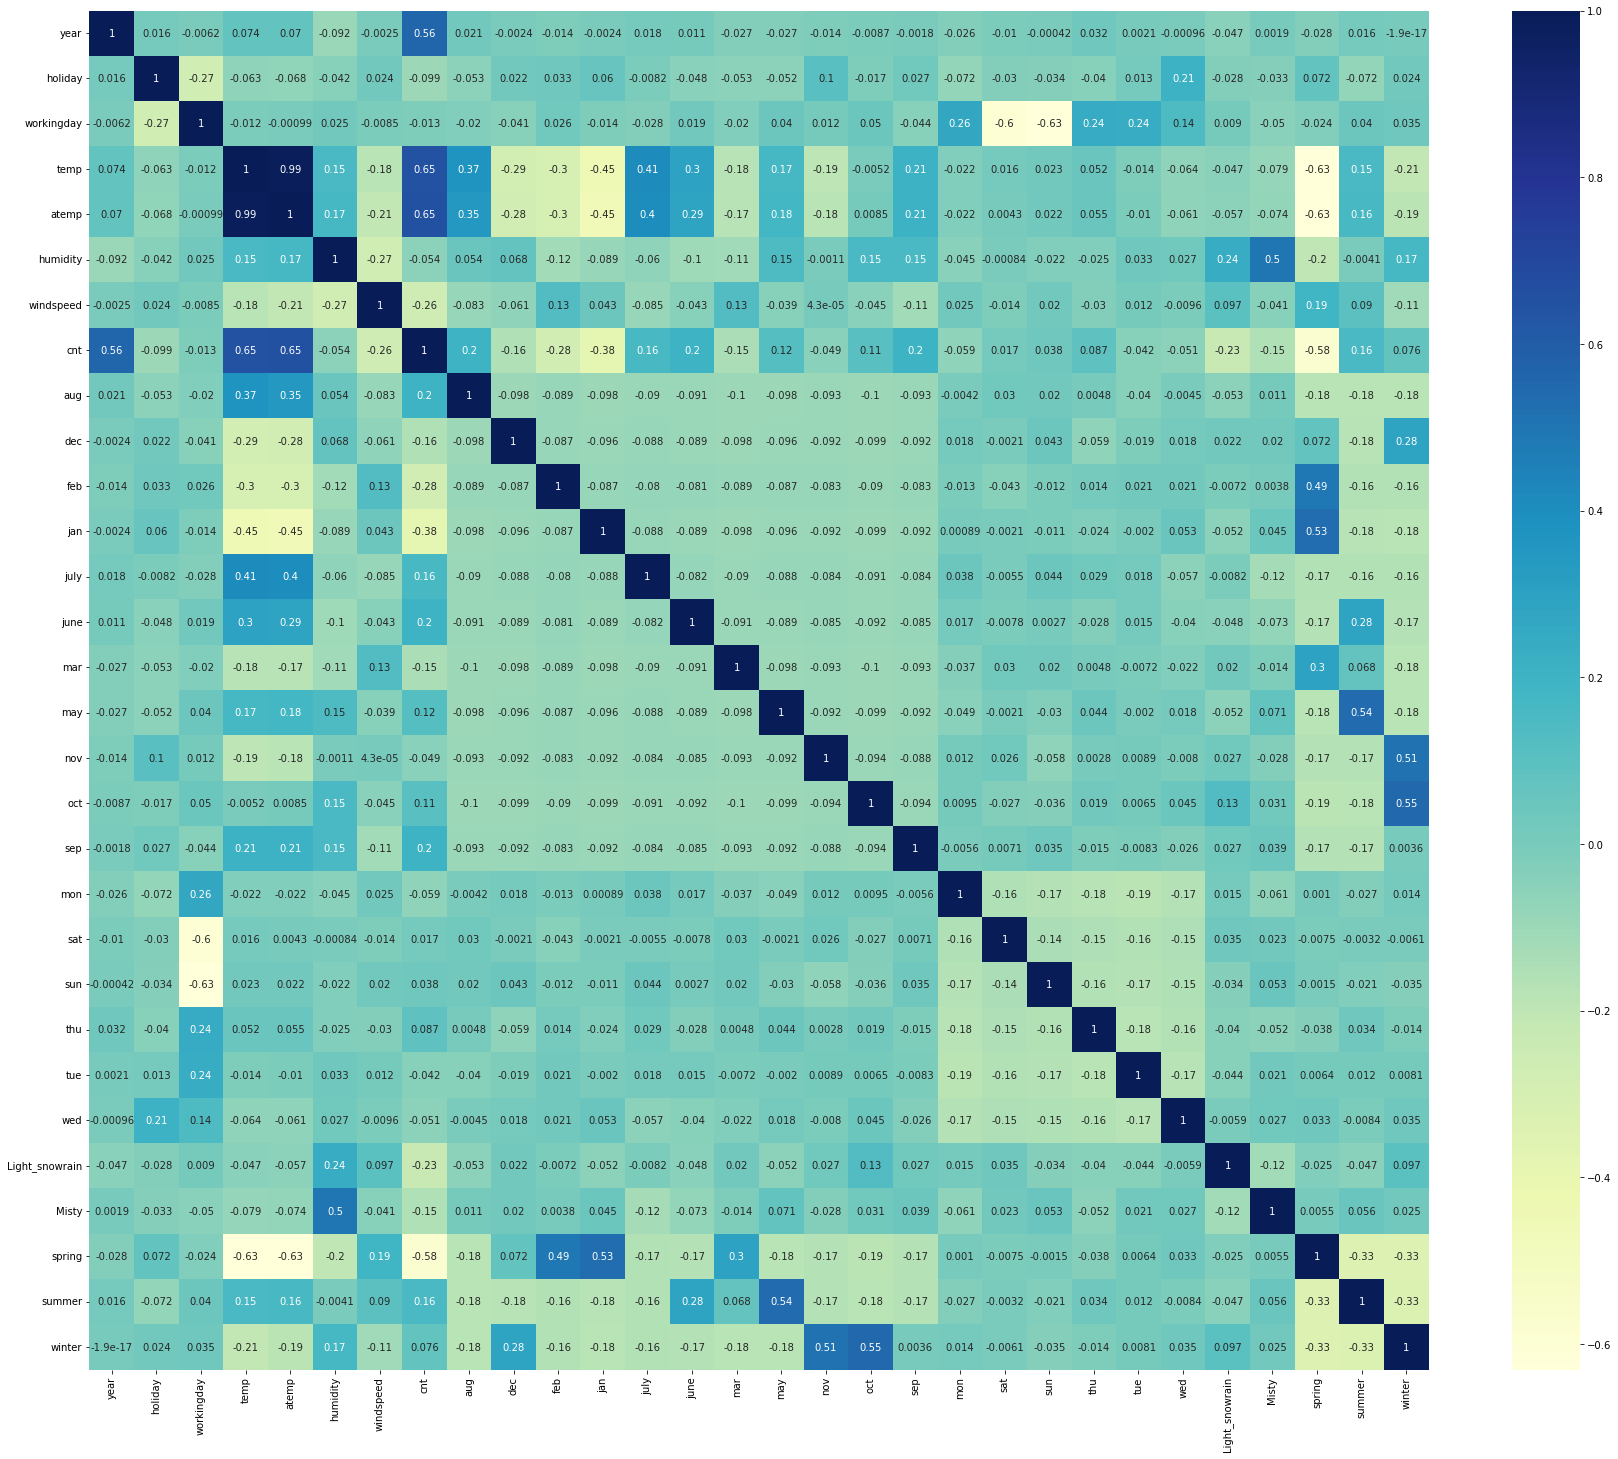

In [47]:
plt.figure(figsize=(30,25))
sns.heatmap(df_train.corr(), annot=True , cmap='YlGnBu')
plt.show()

####  Correlation can be observed between 'cnt' and 'year','temp','atemp'

# Step-5 : Building Model

## Variable Selection using RFE


### Dividing into X and Y set for model building

In [48]:
y_train = df_train.pop('cnt')
X_train = df_train

In [49]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [50]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 11),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 14),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 15),
 ('tue', False, 8),
 ('wed', False, 10),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [51]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [52]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

## Building model using statsmodel, for the detail statistics

In [53]:
# Creating X_test dataframe with RFE variables
X_train_rfe=X_train[col]

In [54]:
# Adding Constant
X_train_sm=sm.add_constant(X_train_rfe)

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Model-1

In [55]:
#Model
lr_1=sm.OLS(y_train,X_train_sm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          9.71e-222
Time:                        21:24:35   Log-Likelihood:                 594.34
No. Observations:                 584   AIC:                            -1157.
Df Residuals:                     568   BIC:                            -1087.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3181      0.034      9.333      0.000       0.251       0.385
year               0.2276      0.007     30.460      0.000       0.213       0.242
holiday           -0.0933      0.023     -4.089      0.000      -0.138      -0.048
temp               0.4843      0.034     14.101      0.000       0.417       0.552
humidity          -0.1569      0.036     -4.399      0.000      -0.227      -0.087
windspeed         -0.1822      0.024     -7.606      0.000      -0.229      -0.135
dec               -0.0453      0.016     -2.879      0.004      -0.076      -0.014
jan               -0.0414      0.017     -2.489      0.013      -0.074      -0.009
july              -0.0549      0.017     -3.212      0.001      -0.088      -0.021
nov               -0.0546      0.018     -3.119      0.002      -0.089      -0.020
sep                0.0663      0.016      4.266      0.000       0.036       0.097
Light_snowrain    -0.2510      0.025     -9.970      0.000      -0.300      -0.202
Misty             -0.0546      0.010     -5.585      0.000      -0.074      -0.035
spring            -0.0706      0.020     -3.598      0.000      -0.109      -0.032
summer             0.0404      0.014      2.868      0.004       0.013       0.068
winter             0.1092      0.016      6.761      0.000       0.077       0.141
==============================================================================
Omnibus:                       87.012   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.812
Skew:                          -0.764   Prob(JB):                     6.82e-49
Kurtosis:                       5.604   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,31.19
2,temp,18.15
4,windspeed,4.70
12,spring,4.43
14,winter,3.80
13,summer,2.81
11,Misty,2.34
0,year,2.11
8,nov,1.74
6,jan,1.71


# Parameters to eliminate Variables
    - High P-Value, High VIF - Definitely Eliminate 
    - High P-Value , Low VIF- Eliminate First
    - Low P-Value, High VIF -Eliminate after 2nd 

## Cutoff for P-Value <= 0.05
## Cutoff for VIF <= 5

In [57]:
# Dropping 'humidity duee to high VIF'
X_train_rfe_new=X_train_rfe.drop('humidity', axis=1)

### Model-2

In [58]:
X_train_sm_2=sm.add_constant(X_train_rfe_new)
lr_2=sm.OLS(y_train,X_train_sm_2).fit()
lr_2.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     219.8
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          8.39e-219
Time:                        21:24:35   Log-Likelihood:                 584.55
No. Observations:                 584   AIC:                            -1139.
Df Residuals:                     569   BIC:                            -1074.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2425      0.030      8.110      0.000       0.184       0.301
year               0.2322      0.008     30.901      0.000       0.217       0.247
holiday           -0.0926      0.023     -3.996      0.000      -0.138      -0.047
temp               0.4462      0.034     13.214      0.000       0.380       0.513
windspeed         -0.1531      0.023     -6.545      0.000      -0.199      -0.107
dec               -0.0534      0.016     -3.359      0.001      -0.085      -0.022
jan               -0.0475      0.017     -2.821      0.005      -0.081      -0.014
july              -0.0495      0.017     -2.860      0.004      -0.084      -0.016
nov               -0.0565      0.018     -3.176      0.002      -0.091      -0.022
sep                0.0600      0.016      3.814      0.000       0.029       0.091
Light_snowrain    -0.2958      0.023    -12.639      0.000      -0.342      -0.250
Misty             -0.0798      0.008     -9.933      0.000      -0.096      -0.064
spring            -0.0783      0.020     -3.940      0.000      -0.117      -0.039
summer             0.0350      0.014      2.451      0.015       0.007       0.063
winter             0.0975      0.016      6.025      0.000       0.066       0.129
==============================================================================
Omnibus:                       87.660   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.972
Skew:                          -0.764   Prob(JB):                     5.17e-50
Kurtosis:                       5.644   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif = pd.DataFrame()
vif['Features'] =X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.34
3,windspeed,4.65
11,spring,2.87
13,winter,2.78
12,summer,2.28
0,year,2.08
7,nov,1.69
5,jan,1.62
6,july,1.61
10,Misty,1.56


### Model-3

In [60]:
X_train_rfe_new=X_train_rfe_new.drop('nov', axis=1)

In [61]:
X_train_sm_3=sm.add_constant(X_train_rfe_new)
lr_3=sm.OLS(y_train,X_train_sm_3).fit()
lr_3.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     232.3
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          7.84e-218
Time:                        21:24:35   Log-Likelihood:                 579.42
No. Observations:                 584   AIC:                            -1131.
Df Residuals:                     570   BIC:                            -1070.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2164      0.029      7.467      0.000       0.159       0.273
year               0.2320      0.008     30.628      0.000       0.217       0.247
holiday           -0.1017      0.023     -4.384      0.000      -0.147      -0.056
temp               0.4766      0.033     14.598      0.000       0.412       0.541
windspeed         -0.1540      0.024     -6.535      0.000      -0.200      -0.108
dec               -0.0347      0.015     -2.330      0.020      -0.064      -0.005
jan               -0.0400      0.017     -2.383      0.018      -0.073      -0.007
july              -0.0492      0.017     -2.821      0.005      -0.084      -0.015
sep                0.0678      0.016      4.331      0.000       0.037       0.099
Light_snowrain    -0.2920      0.024    -12.394      0.000      -0.338      -0.246
Misty             -0.0785      0.008     -9.708      0.000      -0.094      -0.063
spring            -0.0656      0.020     -3.343      0.001      -0.104      -0.027
summer             0.0429      0.014      3.032      0.003       0.015       0.071
winter             0.0868      0.016      5.440      0.000       0.055       0.118
==============================================================================
Omnibus:                       80.874   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.303
Skew:                          -0.734   Prob(JB):                     1.06e-42
Kurtosis:                       5.406   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif = pd.DataFrame()
vif['Features'] =X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.30
3,windspeed,4.60
10,spring,2.87
11,summer,2.28
0,year,2.08
12,winter,2.02
5,jan,1.61
6,july,1.61
9,Misty,1.56
7,sep,1.34


### Model-4

In [63]:
X_train_rfe_new=X_train_rfe_new.drop('jan', axis=1)

In [64]:
X_train_sm_4=sm.add_constant(X_train_rfe_new)
lr_4=sm.OLS(y_train,X_train_sm_4).fit()
lr_4.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     249.1
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          8.11e-218
Time:                        21:24:36   Log-Likelihood:                 576.53
No. Observations:                 584   AIC:                            -1127.
Df Residuals:                     571   BIC:                            -1070.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1973      0.028      7.055      0.000       0.142       0.252
year               0.2312      0.008     30.429      0.000       0.216       0.246
holiday           -0.1031      0.023     -4.428      0.000      -0.149      -0.057
temp               0.4995      0.031     15.950      0.000       0.438       0.561
windspeed         -0.1482      0.024     -6.294      0.000      -0.194      -0.102
dec               -0.0263      0.015     -1.815      0.070      -0.055       0.002
july              -0.0510      0.018     -2.914      0.004      -0.085      -0.017
sep                0.0686      0.016      4.366      0.000       0.038       0.099
Light_snowrain    -0.2894      0.024    -12.248      0.000      -0.336      -0.243
Misty             -0.0791      0.008     -9.744      0.000      -0.095      -0.063
spring            -0.0697      0.020     -3.555      0.000      -0.108      -0.031
summer             0.0469      0.014      3.321      0.001       0.019       0.075
winter             0.0923      0.016      5.825      0.000       0.061       0.123
==============================================================================
Omnibus:                       77.475   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.303
Skew:                          -0.710   Prob(JB):                     2.59e-40
Kurtosis:                       5.340   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif = pd.DataFrame()
vif['Features'] =X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.24
3,windspeed,4.60
10,summer,2.27
9,spring,2.20
0,year,2.08
11,winter,2.00
5,july,1.60
8,Misty,1.55
6,sep,1.34
4,dec,1.24


### Model-5

In [66]:
X_train_rfe_new=X_train_rfe_new.drop('july', axis=1)

In [67]:
X_train_sm_5=sm.add_constant(X_train_rfe_new)
lr_5=sm.OLS(y_train,X_train_sm_5).fit()
lr_5.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     267.5
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          3.23e-217
Time:                        21:24:36   Log-Likelihood:                 572.22
No. Observations:                 584   AIC:                            -1120.
Df Residuals:                     572   BIC:                            -1068.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1888      0.028      6.745      0.000       0.134       0.244
year               0.2312      0.008     30.235      0.000       0.216       0.246
holiday           -0.1042      0.023     -4.447      0.000      -0.150      -0.058
temp               0.4862      0.031     15.591      0.000       0.425       0.547
windspeed         -0.1473      0.024     -6.220      0.000      -0.194      -0.101
dec               -0.0266      0.015     -1.819      0.069      -0.055       0.002
sep                0.0823      0.015      5.457      0.000       0.053       0.112
Light_snowrain    -0.2903      0.024    -12.209      0.000      -0.337      -0.244
Misty             -0.0776      0.008     -9.513      0.000      -0.094      -0.062
spring            -0.0581      0.019     -3.006      0.003      -0.096      -0.020
summer             0.0625      0.013      4.747      0.000       0.037       0.088
winter             0.1051      0.015      6.853      0.000       0.075       0.135
==============================================================================
Omnibus:                       82.706   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.716
Skew:                          -0.758   Prob(JB):                     1.42e-42
Kurtosis:                       5.371   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] =X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.90
8,spring,2.10
0,year,2.08
9,summer,1.92
10,winter,1.83
7,Misty,1.55
4,dec,1.24
5,sep,1.23
6,Light_snowrain,1.07


###  Model-6

In [69]:
X_train_rfe_new=X_train_rfe_new.drop('dec', axis=1)

In [70]:
X_train_sm_6=sm.add_constant(X_train_rfe_new)
lr_6=sm.OLS(y_train,X_train_sm_6).fit()
lr_6.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     292.7
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          9.54e-218
Time:                        21:24:36   Log-Likelihood:                 570.53
No. Observations:                 584   AIC:                            -1119.
Df Residuals:                     573   BIC:                            -1071.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1788      0.028      6.502      0.000       0.125       0.233
year               0.2309      0.008     30.142      0.000       0.216       0.246
holiday           -0.1043      0.023     -4.443      0.000      -0.150      -0.058
temp               0.4970      0.031     16.203      0.000       0.437       0.557
windspeed         -0.1439      0.024     -6.082      0.000      -0.190      -0.097
sep                0.0846      0.015      5.612      0.000       0.055       0.114
Light_snowrain    -0.2902      0.024    -12.178      0.000      -0.337      -0.243
Misty             -0.0776      0.008     -9.493      0.000      -0.094      -0.062
spring            -0.0557      0.019     -2.883      0.004      -0.094      -0.018
summer             0.0649      0.013      4.952      0.000       0.039       0.091
winter             0.1031      0.015      6.727      0.000       0.073       0.133
==============================================================================
Omnibus:                       78.713   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.667
Skew:                          -0.734   Prob(JB):                     2.63e-39
Kurtosis:                       5.268   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
vif = pd.DataFrame()
vif['Features'] =X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.90
0,year,2.07
7,spring,2.05
8,summer,1.92
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_snowrain,1.07
1,holiday,1.04


### Model-7

In [72]:
X_train_rfe_new=X_train_rfe_new.drop('windspeed', axis=1)

In [73]:
X_train_sm_7=sm.add_constant(X_train_rfe_new)
lr_7=sm.OLS(y_train,X_train_sm_7).fit()
lr_7.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     302.2
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          3.08e-211
Time:                        21:24:36   Log-Likelihood:                 552.27
No. Observations:                 584   AIC:                            -1085.
Df Residuals:                     574   BIC:                            -1041.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1291      0.027      4.770      0.000       0.076       0.182
year               0.2303      0.008     29.167      0.000       0.215       0.246
holiday           -0.1074      0.024     -4.438      0.000      -0.155      -0.060
temp               0.5093      0.032     16.140      0.000       0.447       0.571
sep                0.0886      0.016      5.711      0.000       0.058       0.119
Light_snowrain    -0.3057      0.024    -12.515      0.000      -0.354      -0.258
Misty             -0.0754      0.008     -8.961      0.000      -0.092      -0.059
spring            -0.0635      0.020     -3.194      0.001      -0.103      -0.024
summer             0.0572      0.013      4.253      0.000       0.031       0.084
winter             0.1061      0.016      6.720      0.000       0.075       0.137
==============================================================================
Omnibus:                       79.923   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.540
Skew:                          -0.734   Prob(JB):                     3.11e-41
Kurtosis:                       5.348   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
vif = pd.DataFrame()
vif['Features'] =X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.89
0,year,2.07
7,summer,1.68
5,Misty,1.55
8,winter,1.45
6,spring,1.35
3,sep,1.23
4,Light_snowrain,1.06
1,holiday,1.04


### Model-8

In [75]:
X_train_rfe_new=X_train_rfe_new.drop('sep', axis=1)

In [76]:
X_train_sm_8=sm.add_constant(X_train_rfe_new)
lr_8=sm.OLS(y_train,X_train_sm_8).fit()
lr_8.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     318.4
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.24e-205
Time:                        21:24:36   Log-Likelihood:                 536.13
No. Observations:                 584   AIC:                            -1054.
Df Residuals:                     575   BIC:                            -1015.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1545      0.027      5.630      0.000       0.101       0.208
year               0.2302      0.008     28.384      0.000       0.214       0.246
holiday           -0.1019      0.025     -4.103      0.000      -0.151      -0.053
temp               0.5026      0.032     15.518      0.000       0.439       0.566
Light_snowrain    -0.3008      0.025    -11.999      0.000      -0.350      -0.252
Misty             -0.0718      0.009     -8.328      0.000      -0.089      -0.055
spring            -0.0884      0.020     -4.438      0.000      -0.128      -0.049
summer             0.0344      0.013      2.610      0.009       0.009       0.060
winter             0.0894      0.016      5.610      0.000       0.058       0.121
==============================================================================
Omnibus:                       81.496   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.391
Skew:                          -0.730   Prob(JB):                     3.06e-44
Kurtosis:                       5.471   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] =X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.59
0,year,2.07
6,summer,1.57
4,Misty,1.53
7,winter,1.44
5,spring,1.32
3,Light_snowrain,1.05
1,holiday,1.04


## Considering model-8, The P value of all predictors are less than 0.05 and VIF  is below 5.

# STEP-6 : Residual Analysis

In [78]:
y_train_pred = lr_6.predict(X_train_sm_6)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

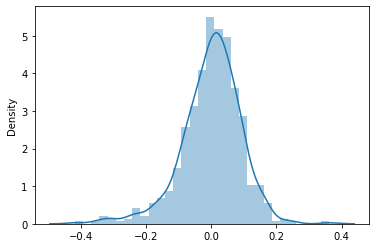

In [79]:
res=y_train-y_train_pred
sns.distplot(res)

# Step-7 : Model Prediction and Evaluation

In [80]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [81]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.547945,0.569603,0.542752,0.635933,0.315127,0.517368,0.061644,0.075342,0.089041,0.075342,0.123288,0.102740,0.061644,0.075342,0.089041,0.054795,0.089041,0.095890,0.232877,0.191781,0.130137,0.082192,0.164384,0.034247,0.315068,0.226027,0.273973,0.219178
std,0.498699,0.182488,0.499409,0.238088,0.222120,0.156357,0.161524,0.212757,0.241335,0.264852,0.285783,0.264852,0.329899,0.304664,0.241335,0.264852,0.285783,0.228362,0.285783,0.295454,0.424119,0.395057,0.337612,0.275602,0.371899,0.182488,0.466142,0.419697,0.447530,0.415114
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.055683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.359075,0.346732,0.534457,0.196160,0.391251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560248,0.544652,0.614856,0.306383,0.508916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.801929,0.743337,0.730570,0.411976,0.649994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.800793,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
y_test = df_test.pop('cnt')
X_test = df_test

In [83]:
col1 = X_train_rfe_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_8 = sm.add_constant(X_test)

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [84]:
y_pred = lr_8.predict(X_test_lm_8)

In [85]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7759791282162563

In [88]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.776

# Step- 8 : Model Evaluation

In [89]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7629


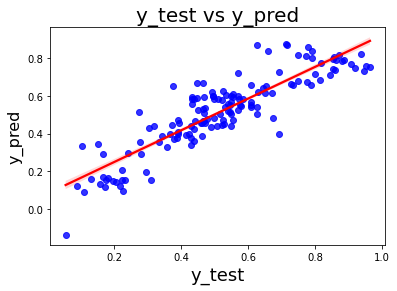

In [92]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

#  Final Verdict

### R^2 for train =0.816
### R^2 for Test= 0.776
### R^2 adjusted Train=0.813
### R^2 adjusted = 0.763

In [91]:
### Top Predictors

round(lr_.params,4)

const             0.1545
year              0.2302
holiday          -0.1019
temp              0.5026
Light_snowrain   -0.3008
Misty            -0.0718
spring           -0.0884
summer            0.0344
winter            0.0894
dtype: float64

# The Model fit is moderate. More improvment can give more good fit model

### Top Predictors
    -temp
    -year
    -spring